In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
Annual_Gold_Value_In_Dollars = pd.read_csv("..\Resources/average_annual_gold_prices.csv")
inflation_rates = pd.read_csv("..\Resources/inflation_rates_2013-2021.csv")
US_inflation_rates = inflation_rates[inflation_rates['country'] == 'United States']
US_inflation_rates = inflation_rates[inflation_rates['country'] == 'United States']

In [3]:
merged_data = pd.merge(Annual_Gold_Value_In_Dollars, US_inflation_rates, left_on='Year', right_on='year', how='inner')
starting_gold_value = merged_data['Price_Avg'].iloc[0]
merged_data['Adjusted_Gold_Value_In_Dollars'] = starting_gold_value * (1 + merged_data['inflation rate'] / 100).cumprod()
merged_data.drop(columns=['country', 'currency', 'inflation rate'], inplace=True)
merged_data.drop(columns=['year'], inplace=True)

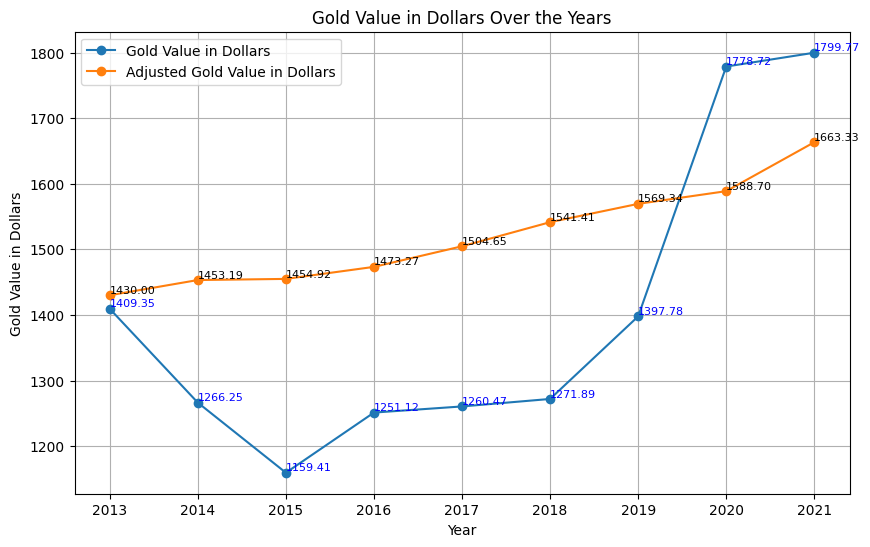

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Price_Avg'], label='Gold Value in Dollars', marker='o')
plt.plot(merged_data['Year'], merged_data['Adjusted_Gold_Value_In_Dollars'], label='Adjusted Gold Value in Dollars', marker='o')
for year, gold_value, adjusted_value in zip(merged_data['Year'], merged_data['Price_Avg'], merged_data['Adjusted_Gold_Value_In_Dollars']):
    plt.text(year, gold_value, f'{gold_value:.2f}', ha='left', va='bottom', fontsize=8, color='blue')
    plt.text(year, adjusted_value, f'{adjusted_value:.2f}', ha='left', va='bottom', fontsize=8, color='black')
plt.xlabel('Year')
plt.ylabel('Gold Value in Dollars')
plt.title('Gold Value in Dollars Over the Years')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('..\Plotted Charts', 'USDollarCurrency.png'))
plt.show()